In [1]:
import pandas as pd
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [2]:
train = pd.read_csv("Train-Set.csv")
train['Weight'].fillna(train['Weight'].mean(), inplace=True)
train['OutletSize'].fillna(train['OutletSize'].mode()[0], inplace=True)

test = pd.read_csv("Test-Set.csv")
test['Weight'].fillna(test['Weight'].mean(), inplace=True)
test['OutletSize'].fillna(test['OutletSize'].mode()[0], inplace=True)

In [3]:
# Encode categorical variables
le = LabelEncoder()
train['FatContent'] = le.fit_transform(train['FatContent'])
train['ProductType'] = le.fit_transform(train['ProductType'])
train['LocationType'] = le.fit_transform(train['LocationType'])
train['OutletType'] = le.fit_transform(train['OutletType'])
train['OutletSize'] = le.fit_transform(train['OutletSize'])

# Standardize numerical features
scaler = StandardScaler()
train[['Weight', 'ProductVisibility', 'MRP']] = scaler.fit_transform(train[['Weight', 'ProductVisibility', 'MRP']])


In [4]:
train.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

In [5]:
test.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
dtype: int64

In [6]:
train.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,-0.841872,1,-0.970732,4,1.747454,OUT049,1999,1,0,1,3735.1380
1,DRC01,-1.641706,2,-0.908111,14,-1.489023,OUT018,2009,1,2,2,443.4228
2,FDN15,1.098554,1,-0.956917,10,0.010040,OUT049,1999,1,0,1,2097.2700
3,FDX07,1.500838,2,-1.281758,6,0.660050,OUT010,1998,1,2,0,732.3800
4,NCD19,-0.929428,1,-1.281758,9,-1.399220,OUT013,1987,0,2,1,994.7052


<AxesSubplot:>

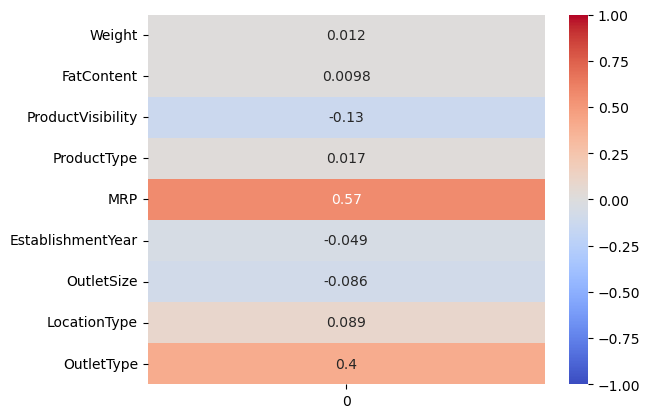

In [7]:
import seaborn as sns

# Separate target variable from predictor variables
X = train.drop("OutletSales", axis=1)
y = train["OutletSales"]

# Calculate correlation matrix
corr_matrix = X.corrwith(y)

# Visualize as heatmap
sns.heatmap(corr_matrix.to_frame(), cmap="coolwarm", annot=True, vmin=-1, vmax=1)


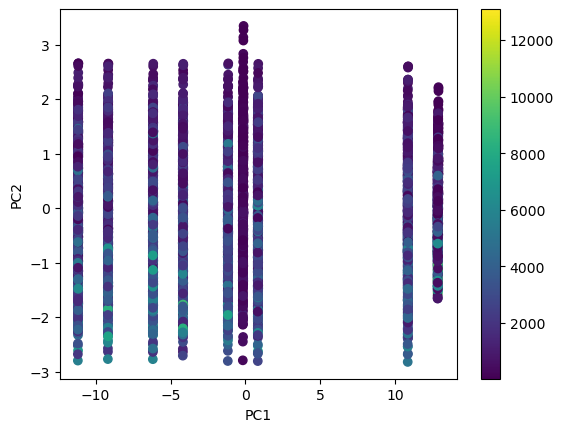

In [8]:
# Drop non-numeric columns from features
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

numeric_cols = ['Weight', 'ProductVisibility', 'MRP', 'EstablishmentYear']
X = train[numeric_cols]

# Fit PCA to the features
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=train['OutletSales'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar()
plt.show()

In [9]:
# Apply one hot encoding to ProductID column
product_id_encoding = pd.get_dummies(train['ProductID'], prefix='ProductID')
train = pd.concat([train, product_id_encoding], axis=1)

# Drop original ProductID column
train = train.drop(['ProductID'], axis=1)


In [10]:
train.head()

,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,...,ProductID_NCZ05,ProductID_NCZ06,ProductID_NCZ17,ProductID_NCZ18,ProductID_NCZ29,ProductID_NCZ30,ProductID_NCZ41,ProductID_NCZ42,ProductID_NCZ53,ProductID_NCZ54
0,-0.841872,1,-0.970732,4,1.747454,OUT049,1999,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,-1.641706,2,-0.908111,14,-1.489023,OUT018,2009,1,2,2,...,0,0,0,0,0,0,0,0,0,0
2,1.098554,1,-0.956917,10,0.010040,OUT049,1999,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1.500838,2,-1.281758,6,0.660050,OUT010,1998,1,2,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.929428,1,-1.281758,9,-1.399220,OUT013,1987,0,2,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
import pandas as pd

# Convert categorical features into numerical format using one-hot encoding
df_encoded = pd.get_dummies(train, columns=["ProductType", "OutletID", "OutletSize", "LocationType", "OutletType"])


In [12]:
df_encoded.columns

Index(['Weight', 'FatContent', 'ProductVisibility', 'MRP', 'EstablishmentYear',
       'OutletSales', 'ProductID_DRA12', 'ProductID_DRA24', 'ProductID_DRA59',
       'ProductID_DRB01',
       ...
       'OutletSize_0', 'OutletSize_1', 'OutletSize_2', 'LocationType_0',
       'LocationType_1', 'LocationType_2', 'OutletType_0', 'OutletType_1',
       'OutletType_2', 'OutletType_3'],
      dtype='object', length=1601)

<AxesSubplot:>

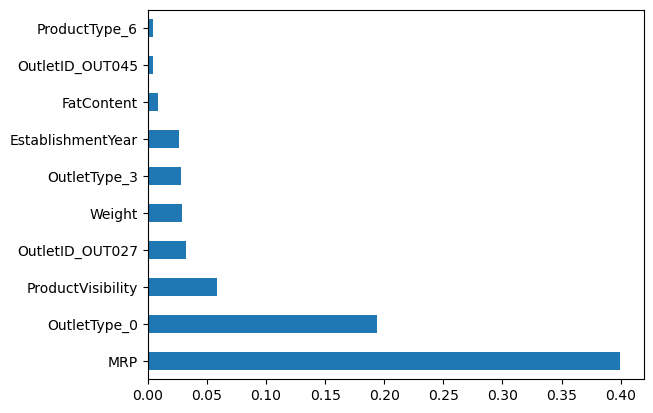

In [13]:

# Separate target variable from predictor variables
X = df_encoded.drop("OutletSales", axis=1)
y = df_encoded["OutletSales"]

# Fit a random forest model to calculate feature importances
rf = RandomForestRegressor()
rf.fit(X, y)

# Plot feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')


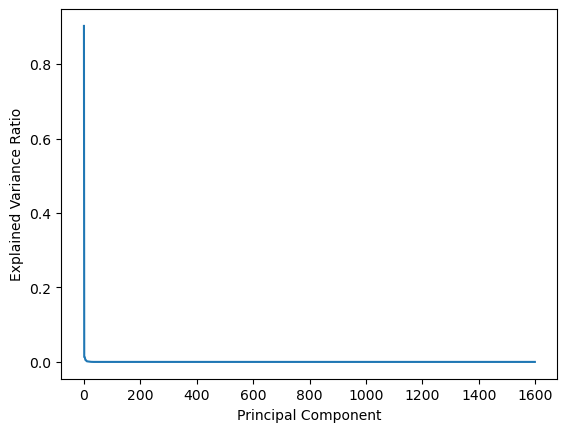

In [14]:
import pandas as pd
from sklearn.decomposition import PCA

# Separate target variable from predictor variables
X = df_encoded.drop("OutletSales", axis=1)
y = df_encoded["OutletSales"]

# Initialize and fit PCA model
pca = PCA()
pca.fit(X)

# Get explained variance ratios for each principal component
explained_variances = pca.explained_variance_ratio_

# Plot the explained variance ratios
import matplotlib.pyplot as plt
plt.plot(range(len(explained_variances)), explained_variances)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

# Choose the number of principal components to keep based on the plot
num_components = 4

# Transform the data using the selected number of principal components
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X)

# Concatenate the transformed data and target variable into a new DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PC{}".format(i+1) for i in range(num_components)])
df_pca["OutletSales"] = y


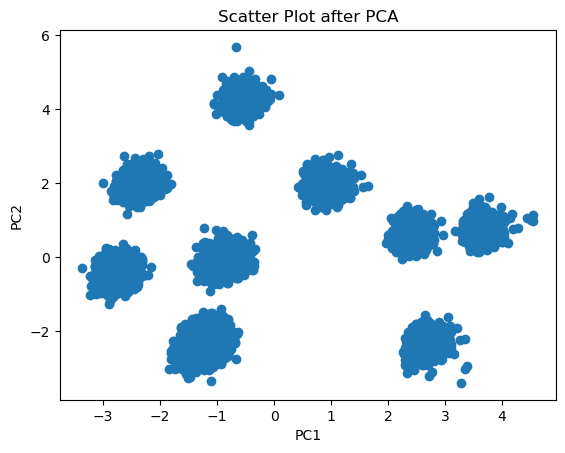

In [15]:
# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

# Create a new dataframe for the principal components
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

# Plot the scatter plot
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('Scatter Plot after PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

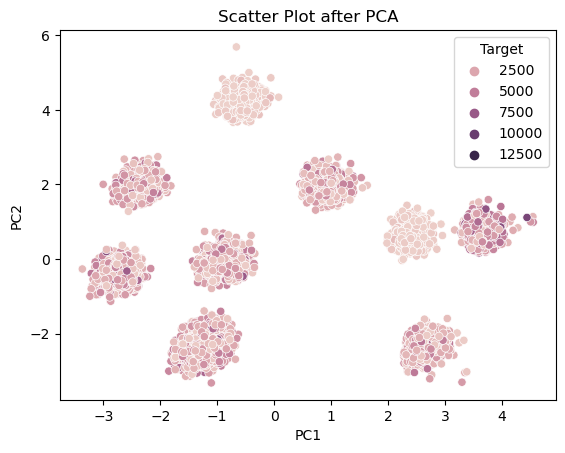

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

# Separate target variable from predictor variables
X = df_encoded.drop("OutletSales", axis=1)
y = df_encoded["OutletSales"]

# Initialize and fit PCA model
pca = PCA()
pca.fit(X)

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_std)

# Create a new dataframe for the principal components and target variable
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
pca_df['Target'] = y.values

# Plot the scatter plot with different colors for each target variable
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Target')
plt.title('Scatter Plot after PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
